## 離散時間システム

### 移動平均
$y = \frac{1}{3}[x(n) + x(n-1) + x(n-2)]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

処理される信号

Text(0, 0.5, 'Amplitude')

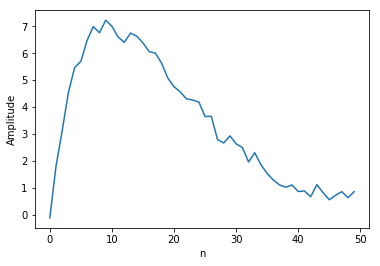

In [4]:
R = 50

d = 0.8 * (np.random.rand(R) - 0.5)
m = np.arange(0, 50)
s = 2 * m * (0.9 ** m)
x = s + d
plt.plot(m, x)
plt.xlabel('n')
plt.ylabel('Amplitude')

`for`ループを避ける書き方

Text(0, 0.5, 'Amplitude')

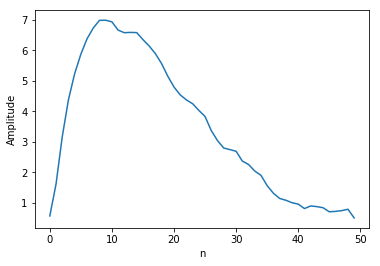

In [7]:
x1 = np.hstack((0, 0, x))
x2 = np.hstack((0, x, 0))
x3 = np.hstack((x, 0, 0))
y = (x1 + x2 + x3) / 3
plt.plot(m, y[1:R+1])
plt.xlabel('n')
plt.ylabel('Amplitude')

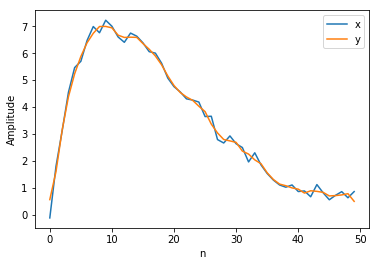

In [10]:
# 結果を比較
plt.plot(m, x, label='x')
plt.plot(m, y[1:R+1], label='y')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()

## LTIシステム

### 畳み込み
入力信号の長さを$L$、インパルス応答の長さを$N$としたとき、出力信号の長さは$N + L -1$になる

Text(0, 0.5, 'Amplitude')

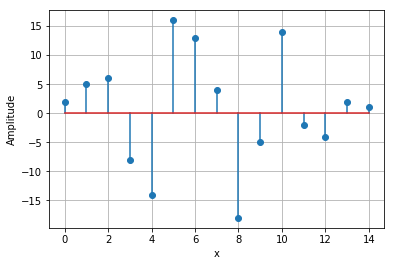

In [12]:
h = np.array([2, 1, -2, 1, 0, 4, -1, 0, 1]) # インパルス応答
x = np.array([1, 2, 3, -4, -3, 2, 1]) # 入力信号
y = np.convolve(h, x)
n = np.arange(0, 15)
plt.stem(n, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('Amplitude')

### LTIシステムの縦続接続と並列接続

縦続接続

$h(n) = h_1(n) * h_2(n) * \cdots h_L(n)$

並列接続

$h(n) = \sum_{j=1}^L h_j(n)$

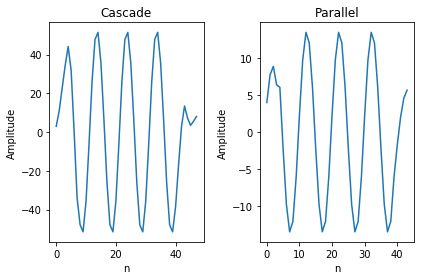

In [28]:
n = np.arange(0, 40)
x = np.cos(2 * np.pi * 0.1 * n)
h1 = np.array([1, 2, 3, 4, 5])
h2 = np.array([3, 2.5, 1.0, -1.0, 2.0])

# 縦続接続
hcascade = np.convolve(h1, h2)
# 並列接続
hparallel = h1 + h2

yc = np.convolve(x, hcascade)
yp = np.convolve(x, hparallel)

plt.subplot(1, 2, 1)
plt.plot(range(len(yc)), yc)
plt.title('Cascade')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(range(len(yp)), yp)
plt.title('Parallel')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()

### 差分方程式

以下のような差分方程式を考える

$y(n) - 0.4y(n-1) + 0.7y(n-2) = 2.24x(n) + 2.49x(n-1) + 2.24x(n-2)$

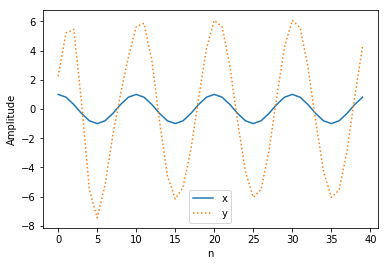

In [31]:
from scipy.signal import lfilter

n = np.arange(0, 40)
x = np.cos(2* np.pi * 0.1 * n)
b = np.array([2.24, 2.49, 2.24]) # 左辺の係数
a = np.array([1, -0.4, 0.7]) # 右辺の係数
y = lfilter(b, a, x)
plt.plot(n, x, '-', label='x')
plt.plot(n, y, ':', label='y')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()

### IIRフィルタの収束、発散

In [36]:
def impz(b, a, N):
    n = np.ones(N)
    h = lfilter(b, a, n)
    
    return h

収束

Text(0, 0.5, 'Amplitude')

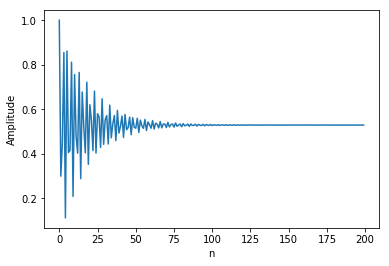

In [37]:
b = [1, 0.8]
a = [1, 1.5, 0.9]
N = 200
h = impz(b, a, N)
n = np.arange(0, N)
plt.plot(n, h)
plt.xlabel('n')
plt.ylabel('Amplitude')

発散

Text(0, 0.5, 'Amplitude')

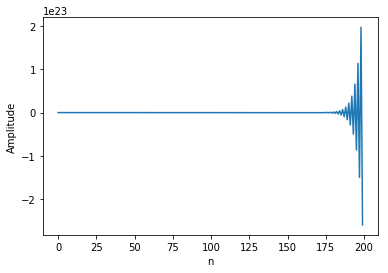

In [40]:
a2 = [1, 2.0, 0.9]
h2 = impz(b, a2, N)
n = np.arange(0, N)
plt.plot(n, h2)
plt.xlabel('n')
plt.ylabel('Amplitude')

### 離散時間システムの周波数応答

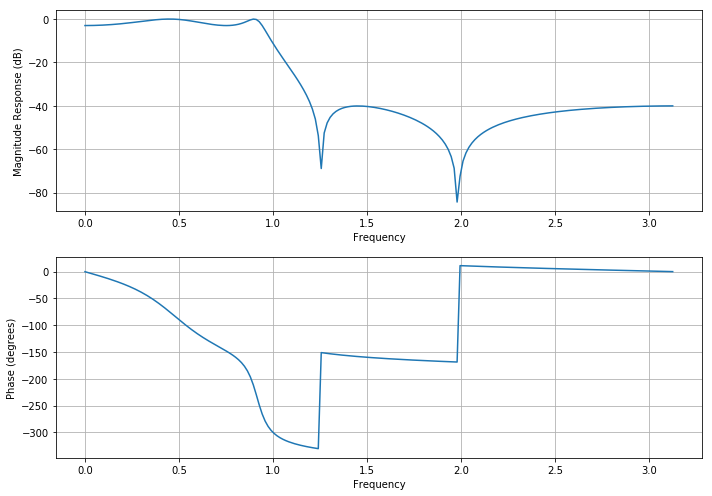

In [61]:
from scipy.signal import freqz

N = 200 # 0 ~ piまでの周波数をN等分する
b = [0.0299, 0.0053, 0.0449, 0.0053, 0.0299]
a = [1.000, -2.5866, 3.2062, -2.0413, 0.5844]
w, h = freqz(b, a, N) 

plt.figure(figsize=(10, 7))

plt.subplot(2, 1, 1)
plt.plot(w, 20*np.log10(np.abs(h)))
plt.xlabel('Frequency')
plt.ylabel('Magnitude Response (dB)')
plt.grid()

plt.subplot(2, 1, 2)
angles = np.rad2deg(np.unwrap(np.angle(h)))
plt.plot(w, angles)
plt.xlabel('Frequency')
plt.ylabel('Phase (degrees)')
plt.grid()

plt.tight_layout()

通過域を確認する場合は線形スケールで確認

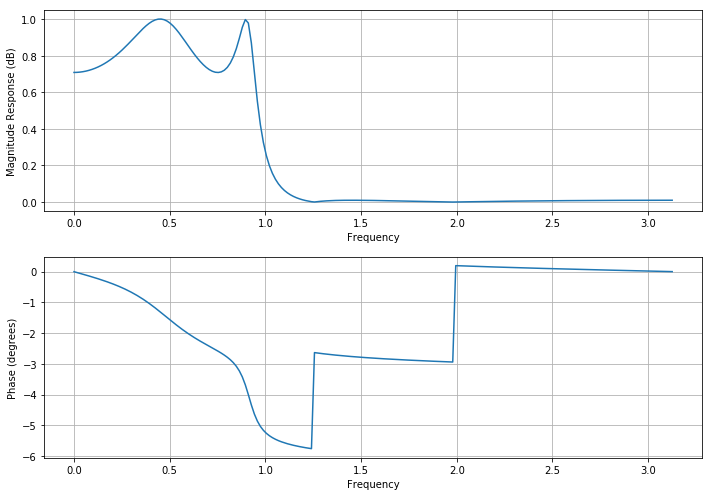

In [63]:
plt.figure(figsize=(10, 7))

plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h))
plt.xlabel('Frequency')
plt.ylabel('Magnitude Response (dB)')
plt.grid()

plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(h))
plt.plot(w, angles)
plt.xlabel('Frequency')
plt.ylabel('Phase (degrees)')
plt.grid()

plt.tight_layout()

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

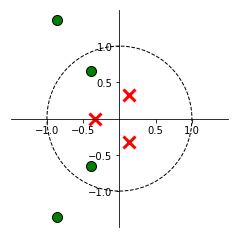

(array([-0.86356943+1.35613676j, -0.86356943-1.35613676j,
        -0.38643057+0.65648598j, -0.38643057-0.65648598j]),
 array([-4.92535809+0.j        , -0.33670382+0.j        ,
         0.13103096+0.32160536j,  0.13103096-0.32160536j]),
 0.36)

In [66]:
b = np.array([2, 5, 9, 6, 3])
a = np.array([5, 25, 2, 1, 1])
zplane(b, a)

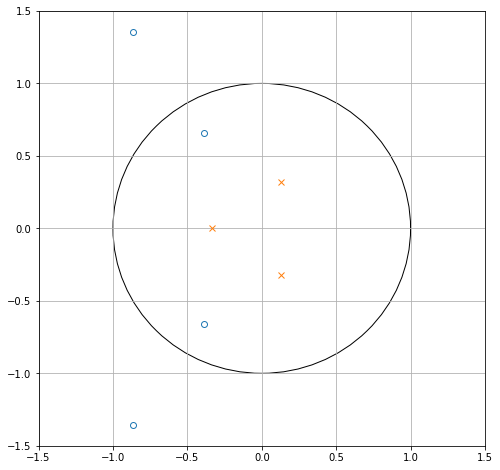

In [76]:
from scipy.signal import tf2zpk

z, p, k = tf2zpk(b, a)
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111)

ax.add_patch(plt.Circle((0.0, 0.0), 1.0, fill=False))
ax.plot(np.real(z), np.imag(z), "o", mfc="white")
ax.plot(np.real(p), np.imag(p), "x", mfc="white")

ax.grid()
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

plt.show()

### 伝達関数の因数分解

In [78]:
from scipy.signal import zpk2sos

b = [2, 5, 9, 6, 3]
a = [5, 25, 2, 1, 1]

z, p, k = tf2zpk(b, a)
sos = zpk2sos(z, p, k)

print(sos)

[[ 0.4         0.69085554  1.03394362  1.          5.26206191  1.65838689]
 [ 1.          0.77286114  0.58030243  1.         -0.26206191  0.12059912]]


各行が各２次区間を表し、最初の３列が分子、後の３列が分母

### 伝達関数の部分分数分解

In [81]:
from scipy.signal import residuez

b = [2, 5, 9, 6, 3]
a = [5, 25, 2, 1, 1]

A, P, C = residuez(b, a)
print(A) # 留数の係数 
print(P) # 極の係数
print(C) # 多項式の係数

[-0.73720275+0.j         -1.06435348-0.52923256j -1.06435348+0.52923256j
  0.26590971+0.j        ]
[-0.33670382+0.j          0.13103096+0.32160536j  0.13103096-0.32160536j
 -4.92535809+0.j        ]
[3.]
